In [ ]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 KB 17.9 MB/s eta 0:00:00


In [ ]:
!pip install plotly==5.13.1

In [ ]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import pandas as pd
import tsfresh as ts
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import json

In [ ]:
df = pd.read_csv('/content/sample_5.csv')
df['id'] = 1
df.head()

,Unnamed: 0,point_timestamp,point_value,id
0,0,2021-07-07,3,1
1,1,2021-07-08,0,1
2,2,2021-07-09,0,1
3,3,2021-07-10,0,1
4,4,2021-07-11,0,1


In [ ]:
df = df.iloc[: , 1:]

In [ ]:
df.isna().sum()

point_timestamp    0
point_value        0
id                 0
dtype: int64

In [ ]:
df_rolled = ts.utilities.dataframe_functions.roll_time_series(df,column_id= 'id',
                                                                column_sort='point_timestamp',
                                                                  min_timeshift=24,
                                                                  max_timeshift=24)

Rolling: 100%|██████████| 74/74 [00:00<00:00, 544.46it/s]


In [ ]:
df_rolled.head()

,point_timestamp,point_value,id
0,2019-09-01 0:00:00,0.072517,"(1, 2019-09-02 0:00:00)"
1,2019-09-01 10:00:00,0.082047,"(1, 2019-09-02 0:00:00)"
2,2019-09-01 11:00:00,0.075394,"(1, 2019-09-02 0:00:00)"
3,2019-09-01 12:00:00,0.088835,"(1, 2019-09-02 0:00:00)"
4,2019-09-01 13:00:00,0.071184,"(1, 2019-09-02 0:00:00)"


In [ ]:
df_rolled.isna().sum()

point_timestamp    0
point_value        0
id                 0
dtype: int64

In [ ]:
df_rolled.shape

(3025, 3)

In [ ]:

df_features = ts.extract_features(df_rolled, column_id='id', column_sort='point_timestamp', 
                                       default_fc_parameters=ts.feature_extraction.MinimalFCParameters())
df_features.columns


Feature Extraction: 100%|██████████| 50/50 [00:00<00:00, 928.33it/s]


Index(['point_value__sum_values', 'point_value__median', 'point_value__mean',
       'point_value__length', 'point_value__standard_deviation',
       'point_value__variance', 'point_value__root_mean_square',
       'point_value__maximum', 'point_value__absolute_maximum',
       'point_value__minimum'],
      dtype='object')

In [ ]:
df_features

point_value__sum_values  point_value__median  point_value__mean  \
1 2021-07-31                      6.0                  0.0               0.24   
  2021-08-01                      3.0                  0.0               0.12   
  2021-08-02                      3.0                  0.0               0.12   
  2021-08-03                      3.0                  0.0               0.12   
  2021-08-04                      3.0                  0.0               0.12   
  2021-08-05                      3.0                  0.0               0.12   
  2021-08-06                      3.0                  0.0               0.12   
  2021-08-07                      3.0                  0.0               0.12   
  2021-08-08                      3.0                  0.0               0.12   
  2021-08-09                      0.0                  0.0               0.00   
  2021-08-10                      0.0                  0.0               0.00   
  2021-08-11                      0.0                  0.0               0.00   
  2021-08-12                      0.0                  0.0               0.00   
  2021-08-13                      0.0                  0.0               0.00   
  2021-08-14                      0.0                  0.0               0.00   
  2021-08-15                      0.0                  0.0               0.00   
  2021-08-16                      2.0                  0.0               0.08   
  2021-08-17                      2.0                  0.0               0.08   
  2021-08-18                      4.0                  0.0               0.16   
  2021-08-19                      5.0                  0.0               0.20   
  2021-08-20                     38.0                  0.0               1.52   
  2021-08-21                     91.0                  0.0               3.64   
  2021-08-22                    144.0                  0.0               5.76   
  2021-08-23                    255.0                  0.0              10.20   
  2021-08-24                    369.0                  0.0              14.76   
  2021-08-25                    498.0                  0.0              19.92   
  2021-08-26                    599.0                  0.0              23.96   
  2021-08-27                    686.0                  0.0              27.44   
  2021-08-28                    732.0                  0.0              29.28   
  2021-08-29                    787.0                  1.0              31.48   
  2021-08-30                    898.0                  2.0              35.92   
  2021-08-31                   1014.0                  2.0              40.56   
  2021-09-01                   1109.0                 33.0              44.36   
  2021-09-02                   1222.0                 46.0              48.88   
  2021-09-03                   1300.0                 53.0              52.00   
  2021-09-04                   1353.0                 53.0              54.12   
  2021-09-05                   1415.0                 53.0              56.60   
  2021-09-06                   1581.0                 55.0              63.24   
  2021-09-07                   1756.0                 62.0              70.24   
  2021-09-08                   1947.0                 78.0              77.88   
  2021-09-09                   2117.0                 87.0              84.68   
  2021-09-10                  19118.0                 95.0             764.72   
  2021-09-11                  35926.0                101.0            1437.04   
  2021-09-12                  51591.0                111.0            2063.64   
  2021-09-13                  67193.0                111.0            2687.72   
  2021-09-14                  82337.0                113.0            3293.48   
  2021-09-15                  97273.0                114.0            3890.92   
  2021-09-16                 111972.0                116.0            4478.88   
  2021-09-17                 126270.0        

In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model1.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
p = loaded_model.predict(df_features)

2/2 [==============================] - 0s 6ms/step


In [ ]:
p = p.argmax(axis=1)
counts = np.bincount(p)
selected_mod = np.argmax(counts)

In [ ]:
class_dict = {0:'ARIMA',1:'XgBoost',2:'ETS Model',3:'Neural Prophet'}

In [ ]:
print("Classified Model is ",class_dict[selected_mod])

Classified Model is  ARIMA


In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly

In [ ]:
def plot_model(df,forecast):

  # Create a trace for the time series
  trace = go.Scatter(
      x = df.index, # The dates along the x-axis
      y = df['point_value'], # The values along the y-axis
      mode = 'lines', # Connect the data points with lines
      name = 'Time Series' # Name of the trace for the legend
  )

  # Perform time series forecasting using your chosen method and create trace for the forecasted line
  # For this example, let's assume we have a forecasted line stored in a separate DataFrame called `forecast`
  forecast_trace = go.Scatter(
      x = forecast.index  , # The dates along the x-axis
      y = forecast.values, # The forecasted values along the y-axis
      mode = 'lines', # Connect the data points with lines
      name = 'Forecast' # Name of the trace for the legend
  )

  # Combine the time series trace and forecast trace into one data object
  data = [trace, forecast_trace]

  # Create the layout for the plot
  layout = go.Layout(
      title = 'Time Series Plot with Forecast', # Title of the plot
      xaxis = dict(title = 'Date'), # Label for the x-axis
      yaxis = dict(title = 'Value'), # Label for the y-axis
      hovermode = 'x unified' # Show data for all traces at a given x value
  )

  # Create the figure and plot it
  fig = go.Figure(data=data, layout=layout)
  graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
  return graphJSON

### ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
def arima(train_data,test_data):
  test_result=adfuller(train_data['point_value'])
  print('ADF Statistic: %f' % test_result[0])
  print('p-value: %f' % test_result[1])
  plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

  # Original Series
  fig, axes = plt.subplots(3, 2, sharex=True)
  axes[0, 0].plot(train_data['point_value']); axes[0, 0].set_title('Original Series')
  plot_acf(train_data['point_value'], ax=axes[0, 1])

  # 1st Differencing
  axes[1, 0].plot(train_data['point_value'].diff()); axes[1, 0].set_title('1st Order Differencing')
  plot_acf(train_data['point_value'].diff().dropna(), ax=axes[1, 1])

  # 2nd Differencing
  axes[2, 0].plot(train_data['point_value'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
  plot_acf(train_data['point_value'].diff().diff().dropna(), ax=axes[2, 1])

  plt.show()

  model=ARIMA(train_data['point_value'],order=(1,1,1))
  model_fit=model.fit()

  fc = model_fit.forecast(15, alpha=0.05)  # 95% conf\
  df_test = pd.DataFrame(test_data['point_value'])
  test =np.array(df_test.replace(to_replace=0, method='ffill'))
  #print(y_test,preds)
  mape = np.mean(np.abs((np.array(fc) - test)/test))*100
  #plt.show()
  #print("MAPE Value : ",mape)
  summary =model_fit.summary()
  graphJSON = plot_model(train_data,fc)
  #print(fc)
  return graphJSON,['ARIMA',mape,summary]


ADF Statistic: -3.856910
p-value: 0.002376


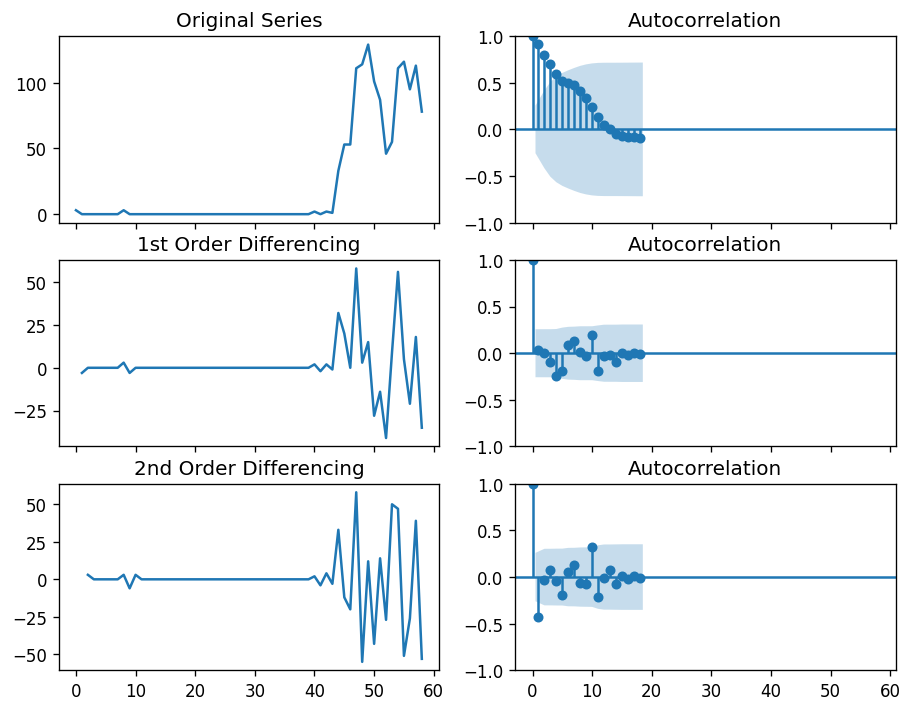

('{"data": [{"mode": "lines", "name": "Time Series", "uid": "1fba3cd3-85ca-4ae0-8246-5c40b8845c2c", "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], "y": [3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 33, 53, 53, 111, 114, 129, 101, 87, 46, 55, 111, 116, 95, 113, 78], "type": "scatter"}, {"mode": "lines", "name": "Forecast", "uid": "c11ee846-897b-4567-951d-5469d3d96441", "x": [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], "y": [76.12262961672879, 75.9336557951725, 75.91463391991985, 75.91271920107071, 75.91252646779797, 75.91250706750094, 75.91250511469062, 75.9125049181231, 75.91250489833686, 75.9125048963452, 75.91250489614472, 75.91250489612455, 75.91250489612251, 75.91250489612231, 75.9125048961223], "

In [ ]:
arima(train_data,test_data)

### XgBoost

In [ ]:
import xgboost as xgb

In [ ]:
def Xgb(df_xg):
  x = np.array(df_xg.index)
  y = np.array(df_xg['point_value'])
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
  dtrain_reg = xgb.DMatrix(np.vstack(X_train),np.vstack(y_train), enable_categorical=True)
  dtest_reg = xgb.DMatrix(np.vstack(X_test), np.vstack(y_test), enable_categorical=True)
  params = {"objective": "reg:squarederror", "tree_method": "hist"}
  model = xgb.train(dtrain=dtrain_reg,params=params, num_boost_round=100)
  preds = model.predict(dtest_reg)
  df_test = pd.DataFrame(y_test)
  y_test =np.array(df_test.replace(to_replace=0, method='ffill'))
  #print(y_test,preds)
  mape = np.mean(np.abs((preds- y_test)/y_test))*100
  print(mape)
  graphJSON = plot_model(df_xg,pd.Series(preds).rename(lambda x: x+len(df_xg)-1))
  return graphJSON,['XgBoost',mape]

In [ ]:
Xgb(df)

11673.981926311031


('{"data": [{"mode": "lines", "name": "Time Series", "uid": "426076c1-31d7-4855-b247-a80815975857", "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], "y": [3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 33, 53, 53, 111, 114, 129, 101, 87, 46, 55, 111, 116, 95, 113, 78, 53, 62, 166, 175, 191, 170, 17003, 16808, 15667, 15603, 15177, 14989, 14752, 14409, 13920], "type": "scatter"}, {"mode": "lines", "name": "Forecast", "uid": "ce714289-619f-45b9-ad56-35770bae9ea7", "x": [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97], "y": [14989.0, 0.00018124263442587107, 110.99803161621094, 1.9998918771743774, 52.99991226196289, 

### ETS Model

In [ ]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [ ]:
def ets(train_data,test_data):
  train =pd.Series(train_data['point_value']).astype('float64')
  test = test_data['point_value']
  model = ETSModel(train)
  fit = model.fit(maxiter=10000)
  #fit.fittedvalues.plot(label="statsmodels fit")
  summary = fit.summary()
  fc = fit.forecast(len(test))
  y_test =np.array(test.replace(to_replace=0, method='ffill'))
  mape = np.mean(np.abs((fc- y_test)/fc))*100
  print(mape )
  graphJSON = plot_model(train_data,fc)
  return graphJSON,['ETS Model',mape,summary]

In [ ]:
ets(train_data,test_data)

11799.210874770262


('{"data": [{"mode": "lines", "name": "Time Series", "uid": "4e9d1a5f-c82b-4779-b095-76401c06b499", "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], "y": [3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 33, 53, 53, 111, 114, 129, 101, 87, 46, 55, 111, 116, 95, 113, 78], "type": "scatter"}, {"mode": "lines", "name": "Forecast", "uid": "4577cb8b-6670-4e2a-a74e-6c5cee213e71", "x": [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], "y": [78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099, 78.00349982002099

### Neural Prophet

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
def neural_prophet(train_data,test_data):
  train = train_data
  test = test_data
  train=train.rename(columns={'point_timestamp': 'ds', 'point_value': 'y'})
  test =test.rename(columns={'point_timestamp': 'ds', 'point_value': 'y'})
  train = train[['ds','y']]
  test = test['y']
  model = NeuralProphet()
  metrics = model.fit(train, freq="D") 
  future = model.make_future_dataframe(train, periods=len(test), n_historic_predictions=len(train)) 
  forecast = model.predict(future)
  fc = forecast[-len(test):]['yhat1']
  y_test =np.array(test.replace(to_replace=0, method='ffill'))
  #print(y_test,preds)
  mape = np.mean(np.abs((fc- y_test)/fc))*100
  graphJSON = plot_model(train_data,fc) 
  return graphJSON,['Neural Prophet',mape]

In [ ]:
train_data

,point_timestamp,point_value
0,2021-07-07,3
1,2021-07-08,0
2,2021-07-09,0
3,2021-07-10,0
4,2021-07-11,0
5,2021-07-12,0
6,2021-07-13,0
7,2021-07-14,0
8,2021-07-15,3
9,2021-07-16,0


In [ ]:
neural_prophet(train_data,test_data)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.305% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.305% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_s

Finding best initial lr:   0%|          | 0/205 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.305% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.305% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.649% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.649% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.649% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.649% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 4it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


('{"data": [{"mode": "lines", "name": "Time Series", "uid": "190db31a-557c-4fb1-9b02-6d527041c660", "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], "y": [3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 33, 53, 53, 111, 114, 129, 101, 87, 46, 55, 111, 116, 95, 113, 78], "type": "scatter"}, {"mode": "lines", "name": "Forecast", "uid": "29782dda-b081-4b27-9995-03e875c1fa9a", "x": [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], "y": [116.62515258789062, 120.87606811523438, 142.2179718017578, 145.92262268066406, 147.32058715820312, 148.34161376953125, 148.25550842285156, 153.92637634277344, 158.1773223876953, 179.51919555664062, 183.22384643554688, 184.62181091308594, 185.64285278320312, 185.55673217773438, 191.2

### Train Test Split


In [ ]:
train_size = int(0.8 * len(df))
# Split the data into training and testing sets
train_data = df[:train_size][['point_timestamp','point_value']]
test_data = df[train_size:][['point_timestamp','point_value']]

In [ ]:
test_data

,point_timestamp,point_value
116,2018-09-01T00:00:00.000+0000,227795
117,2018-10-01T00:00:00.000+0000,227975
118,2018-11-01T00:00:00.000+0000,226251
119,2018-12-01T00:00:00.000+0000,219240
120,2019-01-01T00:00:00.000+0000,234307
121,2019-02-01T00:00:00.000+0000,178257
122,2019-03-01T00:00:00.000+0000,210276
123,2019-04-01T00:00:00.000+0000,209958
124,2019-05-01T00:00:00.000+0000,221259
125,2019-06-01T00:00:00.000+0000,214563


In [ ]:
fig = px.line(df,x = 'point_timestamp', y = 'point_value' )
fig.show()

ADF Statistic: -1.070081
p-value: 0.726855


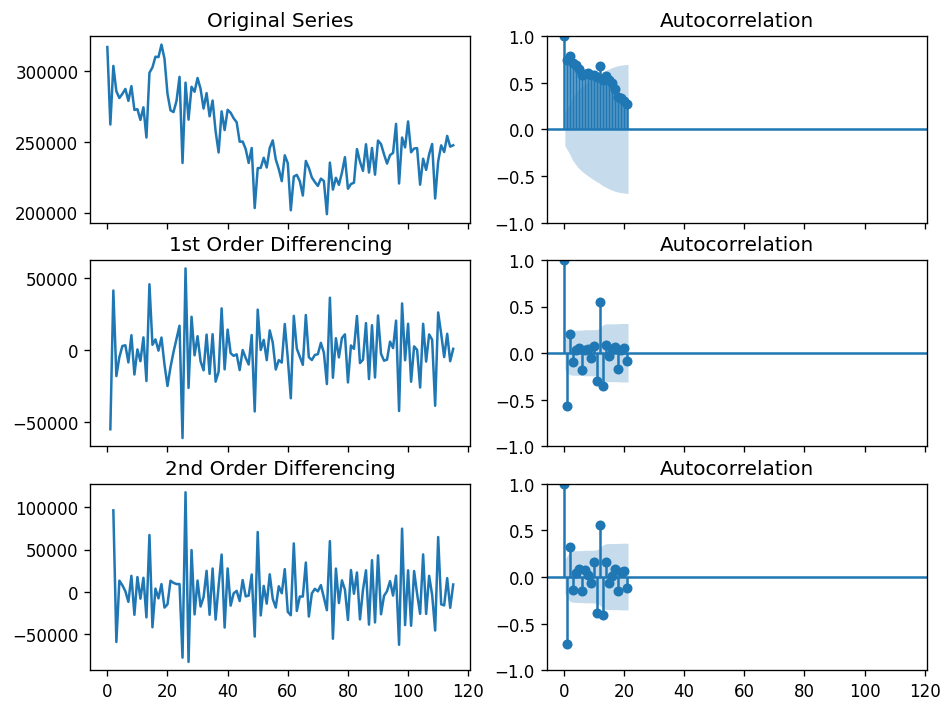

MAPE Value :  27.050578495750248


In [ ]:
if selected_mod == 0:
  arima(train_data,test_data)
elif selected_mod == 1:
  Xgb(df)
elif selected_mod == 2:
  ets(train_data,test_data)
elif selected_mod == 3:
  neural_prophet(train_data,test_data)